## Precipitation Anomaly analysis of Telangana

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# netCDF4 needs to be installed in your environment for this to work
import xarray as xr
import rioxarray as rxr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import geopandas as gpd
import earthpy as et
#!pip install netCDF4 

# Plotting options
sns.set(font_scale=1.3)
sns.set_style("white")

In [13]:
#Import Global Anomaly data
global_anomalies = xr.open_dataset("monthlyanomaly.nc")

In [14]:
from shapely.geometry import mapping

#Clip the data for Telangana
geodf = gpd.read_file("C:/Users/007sh/Desktop/UNDP/telangana_shapefile/Telangana.shp")
global_anomalies.rio.write_crs("epsg:4326", inplace=True)
#xds = rxr.open_rasterio("telangana_shapefile/Telangana.shp")
telangana_anomalies = global_anomalies.rio.clip(geodf.geometry.apply(mapping), geodf.crs)

In [15]:
telangana_anomalies = telangana_anomalies.__xarray_dataarray_variable__

In [16]:
#Get Temperature anomalies of Telangana from 1951-2022 
tel_anomaly = telangana_anomalies.mean(("longitude", "latitude"), skipna=True)

In [17]:
#telangana_anomalies.to_netcdf("telanganaanomaly.nc")

In [18]:
#tel = telangana_anomalies

In [4]:
tel = xr.open_dataset("telanganaanomaly.nc")
tel = tel.__xarray_dataarray_variable__

In [8]:
for i in range (0, len(tel)):
    tel[i].rio.to_raster("C:\\Users\\007sh\\Desktop\\UNDP\\Precipitation\\convert\\telanomaly\\"+"telanganaanomaly"+str(i)+".tif")

In [5]:
from itertools import chain
data = []
for i in range (0, len(tel)):
    x = np.array(tel[i])
    monthlydatapixel = list(chain.from_iterable(x))
    data.append(monthlydatapixel)
    
df = pd.DataFrame(data)
df = df.loc[:, (df != 0).any(axis=0)]
df = df.loc[:, (df != -999).any(axis=0)]
df = df.T.reset_index(drop=True).T
df = df.fillna(0)
#df.to_csv("telanomalies.csv")

ValueError: Only 1d and 2d plots are supported for facets in xarray. See the package `Seaborn` for more options.

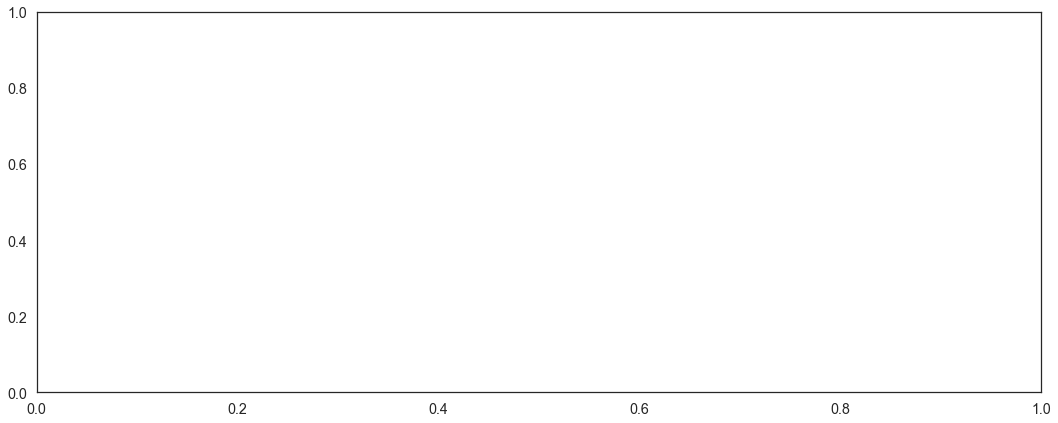

In [7]:
#PLot of Temperature anomalies and Creating a trend line to understand better 
f, ax = plt.subplots(figsize=(18, 7))

tel.plot(hue='lat',ax=ax,color="purple")

plt.xlabel('Year')
plt.ylabel('Anomaly')
plt.title('Telangana precipitation anomalies from 1950 - Present')
plt.savefig('TelanganaPrecpAnomalies.png')

In [23]:
#Saving Telangana anomaly data for future use
telangana_anomalies[870].to_netcdf(path="telanganaanomaly_july2022.tif")

In [24]:
from osgeo import gdal
import matplotlib.pyplot as plt
from osgeo import osr

spatref = osr.SpatialReference()
spatref.ImportFromEPSG(4326)
crs_wkt = spatref.ExportToWkt()

dataset = gdal.Open('telanganaanomaly_july2022.tif', gdal.GA_ReadOnly) 
dataset.SetProjection(crs_wkt)
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()

In [1]:
geotransform = dataset.GetGeoTransform()

originX,pixelWidth,empty,finalY,empty2,pixelHeight=geotransform
cols =  dataset.RasterXSize
rows =  dataset.RasterYSize

projection = dataset.GetProjection()

finalX = originX + pixelWidth * cols
originY = finalY + pixelHeight * rows

extentArray = [originX,finalX,originY,finalY]

plt.figure(figsize=(8,8))

im = plt.imshow(arr, cmap= "RdYlGn_r", extent=extentArray, origin="lower")
plt.colorbar(im, fraction=0.03)
plt.gca().invert_yaxis()

plt.rcParams.update({'font.size': 13})
plt.title("Precipitation anomalies in Telangana July 2022\n")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
print(" ")
plt.show()

NameError: name 'dataset' is not defined